# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable trends in data:

1. Temperature increases the closer the city is to latitude 0 and decreases the further away.
2. Cities near latitude 0 are less dry
3. Few cities have a wind speed higher than 25 mph

In [162]:
# Dependencies and Setup
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

outputDirectory = "output_data"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [163]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [164]:
counter = 0
max_cities = len(cities) - 1
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
cities_df = pd.DataFrame(columns=['Name','Cloudiness','Country','Date','Humidity',
                                  'Lat','Lng','Max Temp','Wind Speed'])


#
print(f"Beginning Data Retrieval")
print(f"----------------------------------")
#


for city in cities:
      
    query_url = weather_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    res_json = response.json()
    response_code = res_json.get("cod")

    if response_code == 200:
    
        print(f"Processing city {counter} of {max_cities}, name: {city.capitalize()}")
    
        cities_df = cities_df.append({'Name': res_json["name"],
                                      'Cloudiness': res_json["clouds"]["all"],
                                      'Country': res_json["sys"]["country"],
                                      'Date': res_json["dt"],
                                      'Humidity': res_json["main"]["humidity"],
                                      'Lat': res_json["coord"]["lat"],
                                      'Lng': res_json["coord"]["lon"],
                                      'Max Temp': res_json["main"]["temp_max"],
                                      'Wind Speed': res_json["wind"]["speed"]
                                     }, ignore_index = True)
        
    else:
        print(f"The city {city.capitalize()} could not be found, skipping city...")
        
    counter += 1

Beginning Data Retrieval
----------------------------------
The city Belushya guba could not be found, skipping city...
Processing city 1 of 597, name: Sakakah
The city Sulurpeta could not be found, skipping city...
Processing city 3 of 597, name: Milkovo
Processing city 4 of 597, name: Puri
Processing city 5 of 597, name: Fayaoue
Processing city 6 of 597, name: Phangnga
Processing city 7 of 597, name: Busselton
Processing city 8 of 597, name: Mataura
The city Illoqqortoormiut could not be found, skipping city...
The city Katsiveli could not be found, skipping city...
Processing city 11 of 597, name: Gat
Processing city 12 of 597, name: Hermanus
The city Vaitupu could not be found, skipping city...
Processing city 14 of 597, name: Jamestown
Processing city 15 of 597, name: Qovlar
Processing city 16 of 597, name: Rikitea
Processing city 17 of 597, name: Ixtapa
Processing city 18 of 597, name: Jiazi
Processing city 19 of 597, name: Ushuaia
Processing city 20 of 597, name: Abu kamal
Proce

Processing city 185 of 597, name: Khatanga
Processing city 186 of 597, name: Korla
Processing city 187 of 597, name: Amahai
Processing city 188 of 597, name: Norman wells
Processing city 189 of 597, name: Coquimbo
Processing city 190 of 597, name: Kodiak
Processing city 191 of 597, name: Barnsley
The city Louisbourg could not be found, skipping city...
Processing city 193 of 597, name: Castro
Processing city 194 of 597, name: Cabedelo
Processing city 195 of 597, name: Artesia
Processing city 196 of 597, name: Maputo
Processing city 197 of 597, name: Coihaique
The city Ngukurr could not be found, skipping city...
Processing city 199 of 597, name: Leningradskiy
Processing city 200 of 597, name: High rock
Processing city 201 of 597, name: Thyboron
Processing city 202 of 597, name: Bilibino
Processing city 203 of 597, name: Guerrero negro
Processing city 204 of 597, name: Kiwira
Processing city 205 of 597, name: Bengkulu
Processing city 206 of 597, name: Grindavik
Processing city 207 of 59

Processing city 371 of 597, name: Olinda
Processing city 372 of 597, name: Yatou
Processing city 373 of 597, name: Bentiu
Processing city 374 of 597, name: Maldonado
Processing city 375 of 597, name: Nabire
Processing city 376 of 597, name: Jhinjhak
Processing city 377 of 597, name: Oktyabrskiy
Processing city 378 of 597, name: Ribeira grande
Processing city 379 of 597, name: San quintin
Processing city 380 of 597, name: Salinas
Processing city 381 of 597, name: San rafael
Processing city 382 of 597, name: Nelson bay
Processing city 383 of 597, name: Chapais
Processing city 384 of 597, name: Darhan
Processing city 385 of 597, name: Shenjiamen
Processing city 386 of 597, name: Cap-aux-meules
Processing city 387 of 597, name: Vanavara
Processing city 388 of 597, name: Severnoye
Processing city 389 of 597, name: Beisfjord
Processing city 390 of 597, name: Chala
Processing city 391 of 597, name: Champerico
The city Tidore could not be found, skipping city...
Processing city 393 of 597, nam

Processing city 559 of 597, name: San juan del sur
The city Paradwip could not be found, skipping city...
Processing city 561 of 597, name: Antsohihy
Processing city 562 of 597, name: Khandyga
Processing city 563 of 597, name: Porto novo
Processing city 564 of 597, name: Tura
Processing city 565 of 597, name: Houma
Processing city 566 of 597, name: Carmarthen
Processing city 567 of 597, name: Muli
Processing city 568 of 597, name: Wajid
Processing city 569 of 597, name: Campbell river
The city Mocambique could not be found, skipping city...
Processing city 571 of 597, name: Makaryev
Processing city 572 of 597, name: Olten
Processing city 573 of 597, name: Horn lake
Processing city 574 of 597, name: Sangar
Processing city 575 of 597, name: Helena
Processing city 576 of 597, name: Karaton
Processing city 577 of 597, name: Primorsk
Processing city 578 of 597, name: Barra do garcas
Processing city 579 of 597, name: Ayan
Processing city 580 of 597, name: Nome
Processing city 581 of 597, nam

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [165]:
cities_df.to_csv(os.path.join(outputDirectory,"cities.csv"))
cities_df.count()


Name          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [166]:
cities_df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sakakah,0,SA,1589317465,11,29.97,40.21,78.80,5.82
1,Mil'kovo,0,RU,1589317466,67,54.72,158.62,41.25,1.68
2,Puri,20,IN,1589317466,94,19.80,85.85,80.60,14.05
3,Fayaoué,12,NC,1589317466,59,-20.65,166.53,73.04,8.46
4,Phang Nga,75,TH,1589317466,94,8.45,98.53,78.80,6.93


In [167]:
cities_df["Humidity"] = cities_df["Humidity"].astype(float)
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype(float)

cities_df.dtypes

Name           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [168]:
def  plotScatter(df, yVar, title, ylabel):
    sp = df.plot(kind="scatter", x="Lat",y=yVar, s=40, c="#6d1714", 
                    edgecolors="#200404", title=title)
    sp.set(xlabel = "Latitude", ylabel = ylabel)
    sp.grid()
    return sp

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

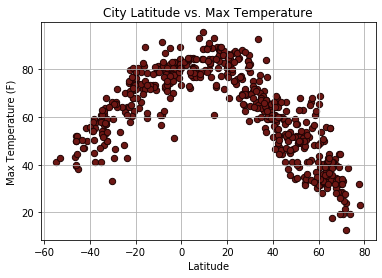

In [169]:
graph = plotScatter(cities_df, "Max Temp", "City Latitude vs. Max Temperature", "Max Temperature (F)")
plt.savefig(os.path.join(outputDirectory,"scatter_lat_temp.png"))

The scatterplot is showing the relationship between Latitude (independient variable) and temperature (dependent variable) it's suggesting that there is a correlation between max temperature and latitude, on average cities that are closer to latitude 0 show higher temperatures than the ones that are more far away from it.

#### Latitude vs. Humidity Plot

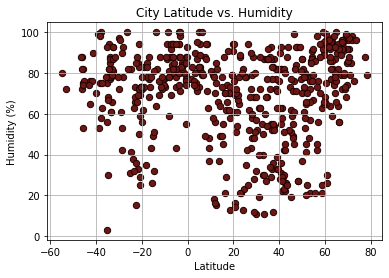

In [170]:
graph = plotScatter(cities_df, "Humidity", "City Latitude vs. Humidity", "Humidity (%)")
plt.savefig(os.path.join(outputDirectory,"scatter_lat_hum.png"))

The scatterplot is showing  the relationship between latitude (independiente variable) and humidity (dependent variable) it's sugessting that cities near ecuator (0 latitude) usually have a high percentage of humidity.

#### Latitude vs. Cloudiness Plot

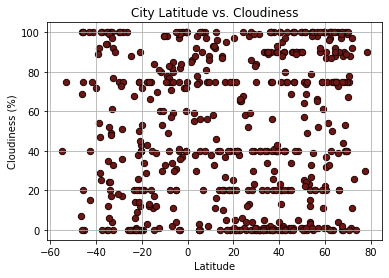

In [171]:
graph = plotScatter(cities_df, "Cloudiness", "City Latitude vs. Cloudiness", "Cloudiness (%)")
plt.savefig(os.path.join(outputDirectory,"scatter_lat_cloud.png"))

The scatterplot is showing  the relationship between latitude (independiente variable) and cloudiness (dependent variable), scatterplot is not showing any clear relationship regarding both variables.

#### Latitude vs. Wind Speed Plot

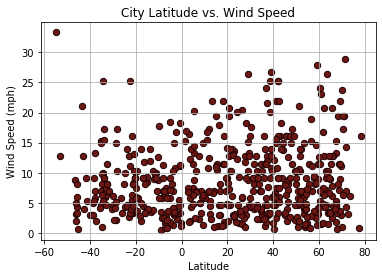

In [172]:
graph = plotScatter(cities_df, "Wind Speed", "City Latitude vs. Wind Speed", "Wind Speed (mph)")
plt.savefig(os.path.join(outputDirectory,"scatter_lat_wind.png"))

The scatterplot is showing  the relationship between latitude (independiente variable) and wind speed (dependent variable), scatterplot shows that almost all cities are below 23 mph wind speed.

## Linear Regression

In [173]:
# OPTIONAL: Create a function to create Linear Regression plots
def  linearRegress(df, yVar, title, ylabel, xShow, yShow):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df["Lat"],df[yVar])
    rgrs_values = df["Lat"] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    graph = plotScatter(df, yVar, title, ylabel)
    plt.plot(df["Lat"],rgrs_values, '#3761c4')
    plt.annotate(line_eq,(xShow,yShow),fontsize=15,color="#3761c4")
    print(f"The r-squared is: {rvalue**2}")
    return graph

In [174]:
# Create Northern and Southern Hemisphere DataFrames
north_df = cities_df.loc[cities_df["Lat"] >= 0]
south_df = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8045959843386509


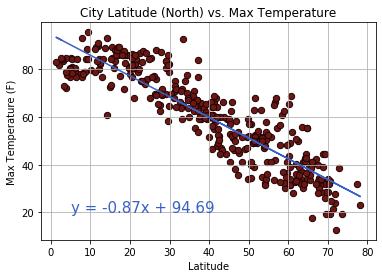

In [175]:
graph = linearRegress(north_df, "Max Temp", "City Latitude (North) vs. Max Temperature", "Max Temperature (F)", 5,20)
plt.savefig(os.path.join(outputDirectory,"regress_north_lat_temp.png"))

Coefficient of determination is high, which is showing a strong relationship between the  variation of temperature and latitude, in thics case movements in temperature can be explained by movements in latitude.
In the case of Northen Hemisphere, graph is showing a negative correlation, while latitude increases, temperature decrease 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6620126990608167


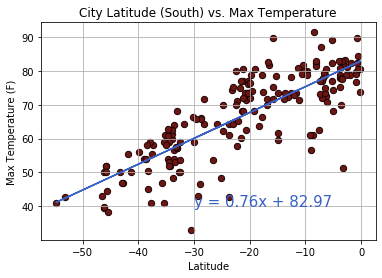

In [176]:
graph = linearRegress(south_df, "Max Temp", "City Latitude (South) vs. Max Temperature", "Max Temperature (F)", -30, 40)
plt.savefig(os.path.join(outputDirectory,"regress_south_lat_temp.png"))

Coefficient of determination is high, which is showing a strong relationship  between the variation of temperature and latitude, in thics case movements in temperature can be explained by movements in latitude.
Grap is showing a positive correlation, while latitude increases and approaches 0, temperature also increases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.043338605112920016


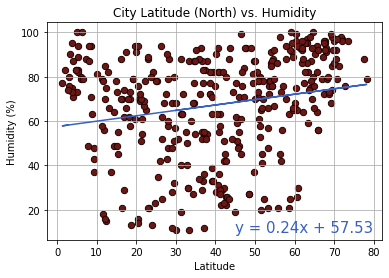

In [177]:
graph = linearRegress(north_df, "Humidity", "City Latitude (North) vs. Humidity", "Humidity (%)", 45,10)
plt.savefig(os.path.join(outputDirectory,"regress_north_lat_hum.png"))

Graph is showing a low coefficient of detemrination, which means that humidity cannot be explained by movements in latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015317672669746811


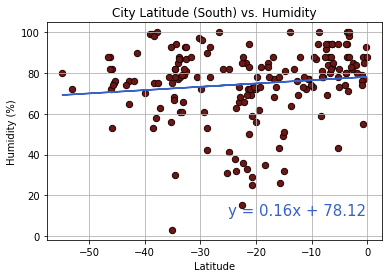

In [178]:
graph = linearRegress(south_df, "Humidity", "City Latitude (South) vs. Humidity", "Humidity (%)", -25,10)
plt.savefig(os.path.join(outputDirectory,"regress_south_lat_hum.png"))

Graph is showing a low coefficient of detemrination, which means that humidity cannot be explained by movements in latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016344040406177505


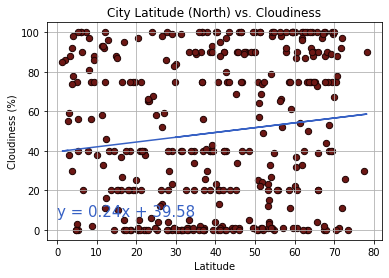

In [179]:
graph = linearRegress(north_df, "Cloudiness", "City Latitude (North) vs. Cloudiness", "Cloudiness (%)", 0,7)
plt.savefig(os.path.join(outputDirectory,"regress_north_lat_cloud.png"))

Graph is showing a low coefficient of detemrination, which means that humidity cannot be explained by movements in latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020276875842479857


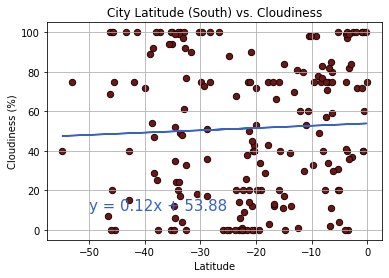

In [180]:
graph = linearRegress(south_df, "Cloudiness", "City Latitude (South) vs. Cloudiness", "Cloudiness (%)", -50,10)
plt.savefig(os.path.join(outputDirectory,"regress_south_lat_cloud.png"))

Graph is showing a low coefficient of detemrination, which means that humidity cannot be explained by movements in latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00012502360519970907


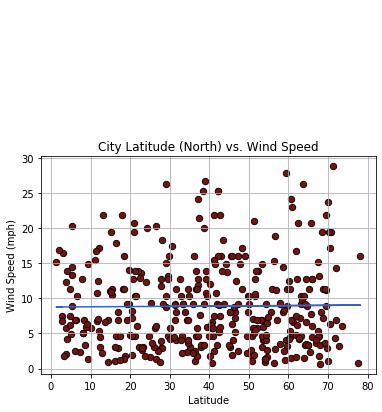

In [181]:
graph = linearRegress(north_df, "Wind Speed", "City Latitude (North) vs. Wind Speed", "Wind Speed (mph)", 0,50)
plt.savefig(os.path.join(outputDirectory,"regress_north_lat_wind.png"))

Graph is showing a low coefficient of detemrination, which means that humidity cannot be explained by movements in latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024468889757512133


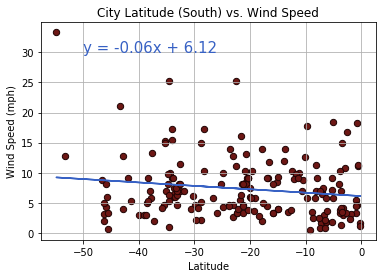

In [182]:
graph = linearRegress(south_df, "Wind Speed", "City Latitude (South) vs. Wind Speed", "Wind Speed (mph)", -50,30)
plt.savefig(os.path.join(outputDirectory,"regress_south_lat_wind.png"))

Graph is showing a low coefficient of detemrination, which means that humidity cannot be explained by movements in latitude